In [2]:
# reload modules before executing code so we can modify modules and test without restarting kernel
%load_ext autoreload
%autoreload 2

import sys
import warnings
sys.path.append('..')
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import torch
from torch import nn
from torch.utils.data import DataLoader, dataset
from tqdm import tqdm

import run_fusi as run
from models import *
import utils
from datasets import FusiDataset

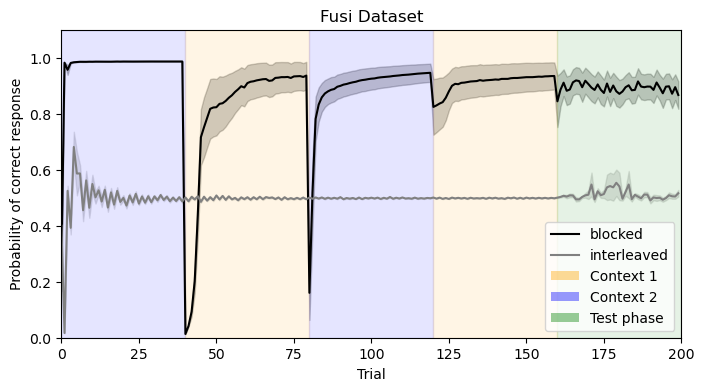

In [3]:
# Set up the parameters for the experiment.
params = utils.Map(
    n_participants = 10,
    state_d = 5, # dimensionality of the state input
    context_d = 5, # dimensionality of the learned context representations
    output_d = 2, # dimensionality of the output layer
    episodic_lr = 0.5, # learning rate for the episodic pathway
    persistance = 0.5, # bias towards memory retention in the recurrent context module
    temperature = 0.2, # temperature for EM retrieval (lower is more argmax-like)
    n_optimization_steps = 5, # number of optimization steps to take for each state
    seed = 0, # random seed for reproducibility
    paradigms=['blocked', 'interleaved']
)

df, _, context_reps = run.run_experiment(params)
fig = utils.plot_results(df, 'Fusi Dataset')
fig.show()

In [ ]:
# Set up the parameters for the experiment.
params = utils.Map(
    n_participants = 10,
    state_d = 5, # dimensionality of the state input
    context_d = 5, # dimensionality of the learned context representations
    output_d = 2, # dimensionality of the output layer
    episodic_lr = 0.5, # learning rate for the episodic pathway
    persistance = 0.5, # bias towards memory retention in the recurrent context module
    temperature = 0.2, # temperature for EM retrieval (lower is more argmax-like)
    n_optimization_steps = 5, # number of optimization steps to take for each state
    seed = 0, # random seed for reproducibility
    paradigms=['blocked', 'interleaved']
)

df, _, context_reps = run.run_experiment(params)
fig = utils.plot_results(df, 'Fusi Dataset')
fig.show()

In [16]:
blocked_contexts.shape

(10, 800, 2)

(-0.5, 799.5, 799.5, -0.5)

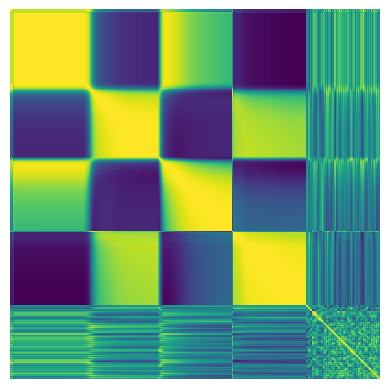

In [35]:
blocked_contexts = context_reps.squeeze()[::2]
sim_mat = np.mean([cosine_similarity(reps, reps) for reps in blocked_contexts], axis=0)
plt.imshow(sim_mat, interpolation='none')
plt.axis('off')